In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv("../../data/bhp.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.00,2.00,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.00,5.00,120.00,4,4615
2,Uttarahalli,3 BHK,1440.00,2.00,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.00,3.00,95.00,3,6245
4,Kothanur,2 BHK,1200.00,2.00,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.00,4.00,231.00,5,6689
13196,other,4 BHK,3600.00,5.00,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.00,2.00,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.00,4.00,488.00,4,10407


In [89]:
df.price.describe()

count   13200.00
mean      112.28
std       149.18
min         8.00
25%        50.00
50%        71.85
75%       120.00
max      3600.00
Name: price, dtype: float64

In [90]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.price_per_sqft.describe()

count      13200.00
mean        7920.34
std       106727.16
min          267.00
25%         4267.00
50%         5438.00
75%         7317.00
max     12000000.00
Name: price_per_sqft, dtype: float64

In [91]:
upper_bound = df.price_per_sqft.quantile(0.999)
lower_bound = df.price_per_sqft.quantile(0.001)

In [92]:
newdf = df[(df.price_per_sqft > lower_bound) & (df.price_per_sqft < upper_bound)]
newdf

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.00,2.00,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.00,5.00,120.00,4,4615
2,Uttarahalli,3 BHK,1440.00,2.00,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.00,3.00,95.00,3,6245
4,Kothanur,2 BHK,1200.00,2.00,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.00,4.00,231.00,5,6689
13196,other,4 BHK,3600.00,5.00,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.00,2.00,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.00,4.00,488.00,4,10407


In [93]:
newdf.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.00,13172.00,13172.00,13172.00,13172.00
mean,1537.86,2.69,111.59,2.80,6663.65
std,967.12,1.34,145.37,1.29,4141.02
min,250.00,1.00,8.00,1.00,1379.00
25%,1100.00,2.00,50.00,2.00,4271.00
50%,1274.50,2.00,71.55,3.00,5438.00
75%,1670.00,3.00,120.00,3.00,7311.00
max,30400.00,40.00,3600.00,43.00,50349.00


In [94]:
StandardDeviation = newdf.price_per_sqft.std()
upper_bound = df.price_per_sqft.mean() + StandardDeviation * 4
lower_bound = df.price_per_sqft.mean() - StandardDeviation * 4
newdf = newdf[(newdf.price_per_sqft > lower_bound) & (newdf.price_per_sqft < upper_bound)]
newdf.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13062.00,13062.00,13062.00,13062.00,13062.00
mean,1530.17,2.67,106.35,2.78,6469.16
std,950.92,1.27,120.72,1.21,3534.43
min,250.00,1.00,8.00,1.00,1379.00
25%,1100.00,2.00,50.00,2.00,4260.00
50%,1270.00,2.00,70.09,3.00,5416.00
75%,1660.30,3.00,118.00,3.00,7232.25
max,30400.00,27.00,2340.00,27.00,24193.00


In [95]:
newdf

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.00,2.00,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.00,5.00,120.00,4,4615
2,Uttarahalli,3 BHK,1440.00,2.00,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.00,3.00,95.00,3,6245
4,Kothanur,2 BHK,1200.00,2.00,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.00,4.00,231.00,5,6689
13196,other,4 BHK,3600.00,5.00,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.00,2.00,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.00,4.00,488.00,4,10407


<Axes: >

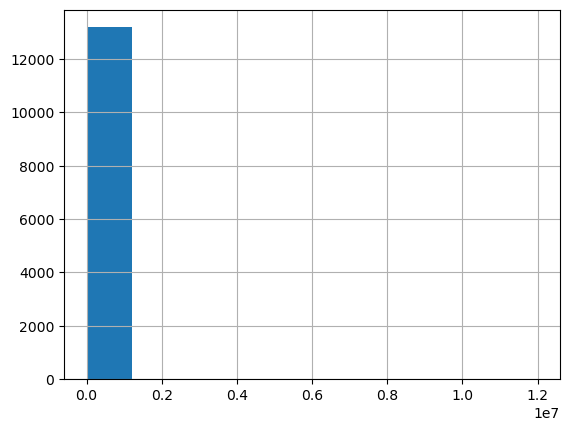

In [96]:
df.price_per_sqft.hist()

<Axes: >

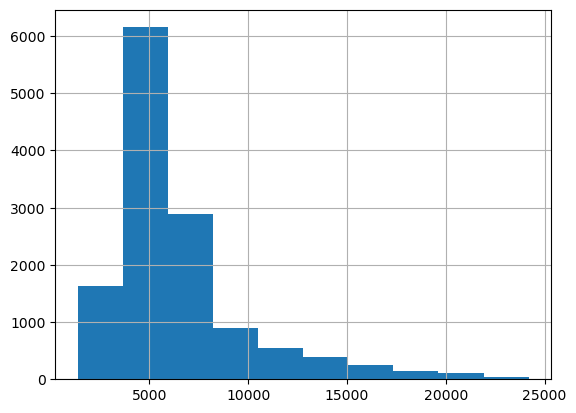

In [97]:
newdf.price_per_sqft.hist()

In [98]:
upper_bound = df.price_per_sqft.quantile(0.999)
lower_bound = df.price_per_sqft.quantile(0.001)
newdf = df[(df.price_per_sqft > lower_bound) & (df.price_per_sqft < upper_bound)]
newdf

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.00,2.00,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.00,5.00,120.00,4,4615
2,Uttarahalli,3 BHK,1440.00,2.00,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.00,3.00,95.00,3,6245
4,Kothanur,2 BHK,1200.00,2.00,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.00,4.00,231.00,5,6689
13196,other,4 BHK,3600.00,5.00,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.00,2.00,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.00,4.00,488.00,4,10407


In [99]:
newdf["zscore"] = (newdf.price_per_sqft-newdf.price_per_sqft.mean())/newdf.price_per_sqft.std()
newdf

C:\Users\anaxi\AppData\Local\Temp\ipykernel_26124\1018276871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf["zscore"] = (newdf.price_per_sqft-newdf.price_per_sqft.mean())/newdf.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.00,2.00,39.07,2,3699,-0.72
1,Chikka Tirupathi,4 Bedroom,2600.00,5.00,120.00,4,4615,-0.49
2,Uttarahalli,3 BHK,1440.00,2.00,62.00,3,4305,-0.57
3,Lingadheeranahalli,3 BHK,1521.00,3.00,95.00,3,6245,-0.10
4,Kothanur,2 BHK,1200.00,2.00,51.00,2,4250,-0.58
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.00,4.00,231.00,5,6689,0.01
13196,other,4 BHK,3600.00,5.00,400.00,4,11111,1.07
13197,Raja Rajeshwari Nagar,2 BHK,1141.00,2.00,60.00,2,5258,-0.34
13198,Padmanabhanagar,4 BHK,4689.00,4.00,488.00,4,10407,0.90


In [100]:
newdf[(newdf.zscore < -4) | (newdf.zscore>4)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.00,6.00,370.00,6,36274,7.15
45,HSR Layout,8 Bedroom,600.00,9.00,200.00,8,33333,6.44
190,Bellandur,4 Bedroom,1200.00,5.00,325.00,4,27083,4.93
733,Cunningham Road,4 BHK,5270.00,4.00,1250.00,4,23719,4.12
760,other,9 Bedroom,600.00,9.00,190.00,9,31666,6.04
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.00,6.00,2800.00,6,35000,6.84
13094,other,4 Bedroom,1200.00,5.00,325.00,4,27083,4.93
13127,other,4 Bedroom,1200.00,5.00,325.00,4,27083,4.93
13185,Hulimavu,1 BHK,500.00,1.00,220.00,1,44000,9.02


In [101]:
newdf = newdf[(newdf.zscore > -4) & (newdf.zscore < 4)]
newdf

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.00,2.00,39.07,2,3699,-0.72
1,Chikka Tirupathi,4 Bedroom,2600.00,5.00,120.00,4,4615,-0.49
2,Uttarahalli,3 BHK,1440.00,2.00,62.00,3,4305,-0.57
3,Lingadheeranahalli,3 BHK,1521.00,3.00,95.00,3,6245,-0.10
4,Kothanur,2 BHK,1200.00,2.00,51.00,2,4250,-0.58
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.00,4.00,231.00,5,6689,0.01
13196,other,4 BHK,3600.00,5.00,400.00,4,11111,1.07
13197,Raja Rajeshwari Nagar,2 BHK,1141.00,2.00,60.00,2,5258,-0.34
13198,Padmanabhanagar,4 BHK,4689.00,4.00,488.00,4,10407,0.90


<Axes: >

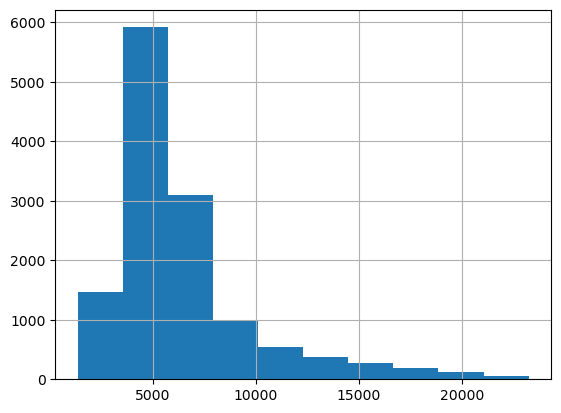

In [102]:
newdf.price_per_sqft.hist()

In [103]:
newdf.describe()

,total_sqft,bath,price,bhk,price_per_sqft,zscore
count,13047.00,13047.00,13047.00,13047.00,13047.00,13047.00
mean,1529.30,2.67,105.85,2.78,6449.33,-0.05
std,948.78,1.27,118.82,1.21,3487.67,0.84
min,250.00,1.00,8.00,1.00,1379.00,-1.28
25%,1100.00,2.00,50.00,2.00,4259.00,-0.58
50%,1270.00,2.00,70.00,3.00,5415.00,-0.30
75%,1660.00,3.00,117.50,3.00,7222.00,0.13
max,30400.00,27.00,2340.00,27.00,23214.00,4.00


In [104]:
newdf[(newdf.zscore < -4) | (newdf.zscore>4)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
